This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses tf.keras, a high-level API to build and train models in TensorFlow.

In [2]:
# Tensorflow and tf.keras

import tensorflow as tf

# import other libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
print(tf.__version__)

2.4.0


This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)

Fashion MNIST is intended as a drop-in replacement for the classic MNIST dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [6]:
fashion_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from 'C:\\Users\\Asus\\AppData\\Roaming\\Python\\Python37\\site-packages\\tensorflow\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [8]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [9]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Explore the data
Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [15]:
#60000 images with size 28px x 28px
train_images.shape

(60000, 28, 28)

In [16]:
len(train_labels)

60000

In [20]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
#10000 images for test data with size 28x28
test_images.shape

(10000, 28, 28)

In [23]:
len(test_labels)

10000

Preprocess the data
The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

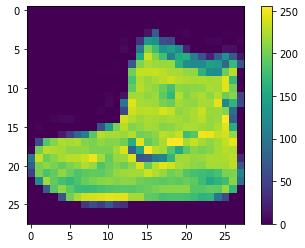

In [25]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

- Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [26]:
train_images = train_images/255.0
test_images = test_images/255.0

- To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

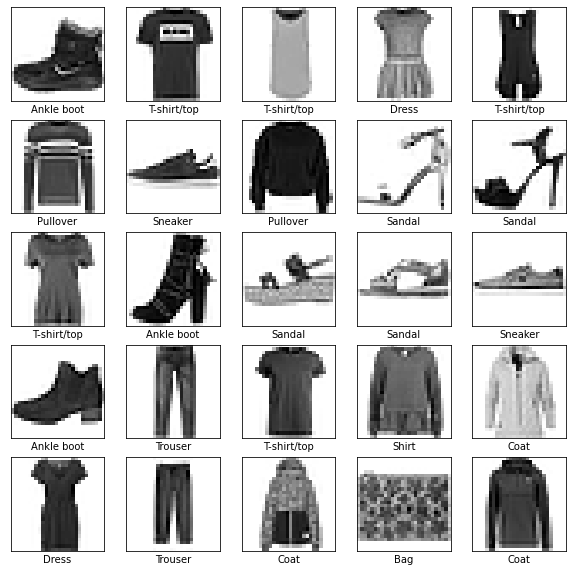

In [29]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
    

### Building Model

Build neural network requires configuring the layers of the model, then compiling the model

- ### SETUP LAYERS

The basic building neural network is the layer. Layers extract representations from the data fed into them.
Hopefully, these representation are meaningful for the problem at hand.

most of deep learning consist of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

####  tf.keras.layers.Flatten
- The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

#### tf.keras.layers.Dense layers
- After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

#### Compile the model
- Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
    - Loss Function = measures how accurate the model is during training. You want to minimizie this function to 'steer' model to the right direction
    - Optimizer = This is how the model is updated based on the data it sees and its loss function
    - Metrics = used to monitor the training and test steps he following example uses accuracy, the fraction of the images that are correctly classified.

In [33]:
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

- ## Training the Model

- Neural network require this steps:
    1. Feed training data to the model. In this example, the training data is in the train_images and train_labels arrays.
    2. The model learn to assosiate image and labels
    3. You ask the model to make prediction about a test set
    4. Verify the predictions match labels from the best labels array

### Feed The Model

To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [35]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6370 - accuracy: 0.7782
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3852 - accuracy: 0.8615
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3412 - accuracy: 0.8754
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3119 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2951 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2795 - accuracy: 0.8939
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2631 - accuracy: 0.9030
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2553 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2489 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.235

Accuracy reach 91%

### Evaluate Accuracy

next, compare how model perform

In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3481 - accuracy: 0.8755

Test accuracy: 0.8755000233650208


it turns out that the accuracy on the dataset is a little less than the accuracy on the training sets. 
This gap represents overfitting. Overfitting happens when ML model perform worse on new, previously unseen inputs than it does on training datasets. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. 

### Make Predictions

With the model trained, you can use it to make predictions about some images. The model's linear outputs, logits. Attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [40]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [42]:
prediction = probability_model.predict(test_images)

In [44]:
prediction[0]

array([3.1109952e-08, 4.4800828e-07, 3.2196554e-09, 1.0195682e-10,
       2.1808144e-09, 1.8058420e-04, 1.3571322e-08, 1.6259084e-02,
       4.0298911e-08, 9.8355973e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [45]:
np.argmax(prediction[0])

9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [47]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [55]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img= true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(prediction_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Verify predictions
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

In [61]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

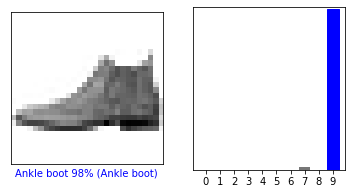

In [59]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()

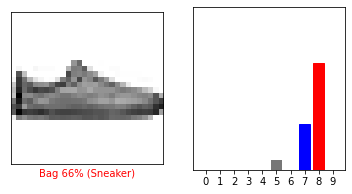

In [63]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()

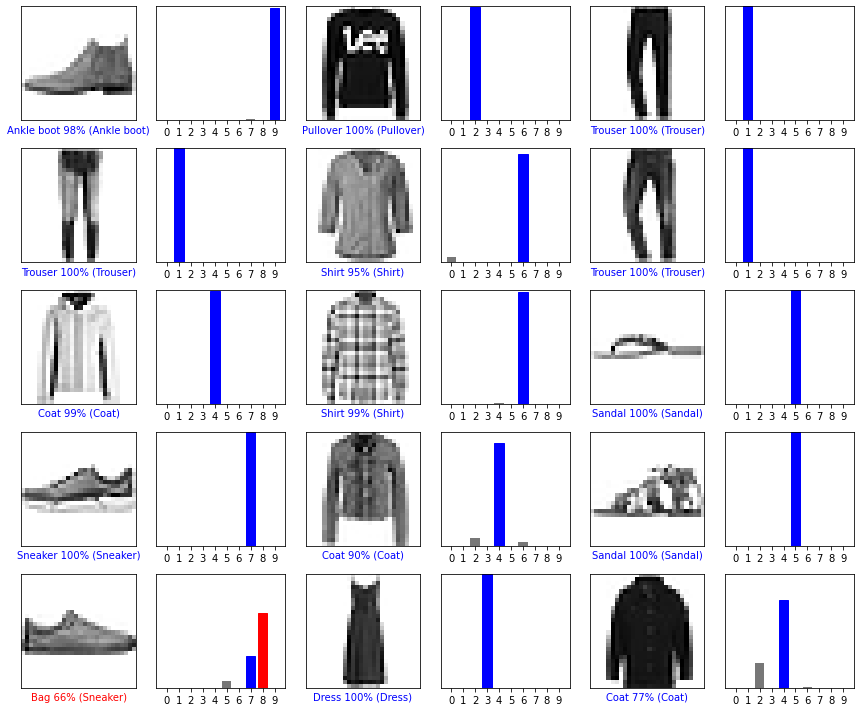

In [65]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], test_labels)
plt.tight_layout()
plt.show()

In [66]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [67]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [68]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.1707114e-05 5.9864158e-12 9.9878162e-01 4.8110510e-10 9.1891008e-04
  1.2488505e-14 2.7774216e-04 3.3685080e-18 8.2640395e-11 1.8367261e-14]]


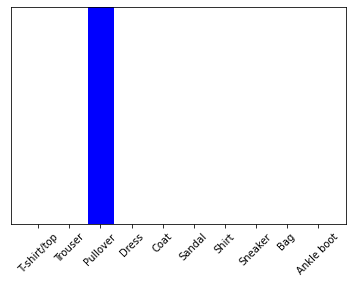

In [69]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [70]:
np.argmax(predictions_single[0])

2